In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
from re import sub
from decimal import Decimal


In [2]:
df = pd.read_csv('../../ML/car-sense-Analytics/car_dataset.csv')


In [3]:
def normalize_segments(raw_segment):
    segments = dict(
        city_values = ['Ciudad'],
        sed_s_values = ['Sedan-SmallSize'],
        sed_m_values = ['Sedan-MidSize', 'Sedan/MidSize/Hybrid'],
        sedan_f_values = ['Sedan-FullSize','Sedan-Fullsize*', 'Sedan-FullSize/Hybrid', 'Sedan-Fullsize'],
        suv_s_values = ['SUV-City', 'SUV-SmallSize'],
        suv_m_values = ['SUV-MidSize'] ,
        suv_f_values = ['SUV-Fullsize', 'SUV-Fullsize/Hybrid', 'SUV-FullSize'],
        suv_xl_values = ['SUV-ExtendedSize','SUV-ExtendedSize/Hybrid'],
        pu_s_values = ['Pickup-SmallSize'],
        pu_m_values = ['Pickup-MidSize'],
        pu_f_values = ['Pickup-FullSize/Hybrid', 'Pickup-FullSize'],
        mini_van_values = ['MiniVan', 'MiniVan/Hybrid']
        
    )
    for k, values in segments.items():
        try:
            if values.index(raw_segment) >= 0:
                return k[:-7]
        except ValueError:
            continue
    
    print('raw_segment: [{}]not found.'.format(raw_segment))
    return 'Not found'
    
df['segment_normalized'] = df['segment'].apply(normalize_segments)

In [4]:
def category_classifer(raw_segment):
    segments = dict(
        city_values = ['Ciudad'],
        sedan_values = [
            'Sedan-SmallSize', 'Sedan-MidSize', 'Sedan/MidSize/Hybrid', 
            'Sedan-FullSize','Sedan-Fullsize*', 'Sedan-FullSize/Hybrid', 'Sedan-Fullsize'
        ],
       
        suv_values = [
            'SUV-City', 'SUV-SmallSize', 'SUV-MidSize', 
            'SUV-Fullsize', 'SUV-Fullsize/Hybrid', 
            'SUV-FullSize','SUV-ExtendedSize', 'SUV-ExtendedSize/Hybrid'
        ],
       
        pu_values = ['Pickup-SmallSize', 'Pickup-MidSize', 'Pickup-FullSize/Hybrid', 'Pickup-FullSize', ],
        mini_van_values = ['MiniVan', 'MiniVan/Hybrid']
        
    )
    for k, values in segments.items():
        try:
            if values.index(raw_segment) >= 0:
                return k[:-7]
        except ValueError:
            continue
    
    print('category: [{}]not found.'.format(raw_segment))
    return 'Not found'

df['category'] = df['segment'].apply(category_classifer)


In [5]:
def ground_category(raw_segment):
    segments = dict(
        city_values = ['Ciudad'],
        sedan_values = [
            'Sedan-SmallSize', 'Sedan-MidSize', 'Sedan/MidSize/Hybrid', 
            'Sedan-FullSize','Sedan-Fullsize*', 'Sedan-FullSize/Hybrid', 'Sedan-Fullsize'
        ],
       
        suv_values = [
            'SUV-City', 'SUV-SmallSize', 'SUV-MidSize', 
            'SUV-Fullsize', 'SUV-Fullsize/Hybrid', 
            'SUV-FullSize','SUV-ExtendedSize', 'SUV-ExtendedSize/Hybrid'
        ],
       
        pu_values = ['Pickup-SmallSize', 'Pickup-MidSize', 'Pickup-FullSize/Hybrid', 'Pickup-FullSize', ],
        mini_van_values = ['MiniVan', 'MiniVan/Hybrid']
        
    )
    for k, values in segments.items():
        try:
            if values.index(raw_segment) >= 0:
                return k[:-7]
        except ValueError:
            continue
    
    print('category: [{}]not found.'.format(raw_segment))
    return 'Not found'

df['category'] = df['segment'].apply(category_classifer)

In [6]:

main_columns = ['brand', 'model']
filtered_df = df[df['dist_axis'].isna()]

df_groupby = df.groupby(['segment_normalized'])['dist_axis'].mean()




print('dist_axis missing values: {}'.format(df['dist_axis'].isnull().sum()))

def fill_missing_dist_axis(row):
    if np.isnan(row['dist_axis']):
        return df_groupby[row['segment_normalized']]
    else:
        return row['dist_axis']



df['dist_axis'] = df.apply(lambda row: fill_missing_dist_axis(row), axis=1)

print('dist_axis missing values: {}'.format(df['dist_axis'].isnull().sum()))
df['dist_axis'] 

dist_axis missing values: 0
dist_axis missing values: 0


0     2.60
1     2.70
2     2.80
3     2.50
4     2.60
      ... 
87    2.77
88    2.77
89    2.81
90    2.90
91    2.27
Name: dist_axis, Length: 92, dtype: float64

## Transformations of data

In [39]:


# df['max_price'] = df['max'].apply(lambda x:Decimal(sub(r'[^\d.]', '', x) ))
# df['min_price'] = df['min'].apply(lambda x:Decimal(sub(r'[^\d.]', '', x) ))
# df['trunk_size_number'] = df['trunk_size'].apply(lambda x:Decimal(sub(r'[^\d.]', '', x) ))
# df['transmission_automatic'] = df['transmission'].apply(lambda x: 1 if 'A' in x else 0)

# df['weight_number'] = df['weight'].apply(lambda x:Decimal(sub(r'[^\d.]', '', str(x)) ))
df['tank_number'] = df['tank'].apply(lambda x:Decimal(sub(r'[^\d.]', '', str(x)) ))

cast_boolean = lambda x: 1 if x == 'yes' else 0

# Yes/No Columns
df['cruise_control_advanced'] = df['cruise_control_advanced'].apply(cast_boolean)
df['cruise_control'] = df['cruise_control'].apply(cast_boolean)
df['blind_spot_alert'] = df['blind_spot_alert'].apply(cast_boolean)

df['rain_sensor'] = df['rain_sensor'].apply(cast_boolean)
df['car_tow'] = df['car_tow'].apply(cast_boolean)
df['car_pull'] = df['car_pull'].apply(cast_boolean)
df['rain_sensor'] = df['rain_sensor'].apply(cast_boolean)

In [9]:
# df['height_to_the ground_number'] = df['height_to_the ground']

def cast_height_to_ground(ground):
    value = ground.split('/')[0]
    switcher = {
        'normal': 0,
        'high': 1,
        'extra_high': 2
    }

    return switcher.get(value)

df['ground_clearance'] = df['height_to_the ground'].apply(cast_height_to_ground)


,brand,model,year,max,min,adult passangers,weight,transmission,fuel,tank,...,body_type,segment,segment_normalized,category,max_price,min_price,trunk_size_number,transmission_automatic,weight_number,ground_clearance
0,Toyota,Yaris,2024,"$388,700","$312,800",5,1035,A/S,Gas,40,...,Sedan,Sedan-SmallSize,sed_s,sedan,388700,312800,475,1,1035,0
1,Toyota,Corolla,2024,"$529,900","$419,900",5,1405,A,Gas,50,...,Sedan,Sedan-MidSize,sed_m,sedan,529900,419900,361,1,1405,0
2,Toyota,Cambry,2024,"$598,800","$571,900",5,1515,A,Gas,60.6,...,Sedan,Sedan-Fullsize*,sedan_f,sedan,598800,571900,427,1,1515,0
3,Toyota,Raize,2024,"$400,000","$378,400",5,1035,A/S,Gas,36,...,SUV,SUV-SmallSize,suv_s,suv,400000,378400,369,1,1035,1
4,Toyota,Corolla Cross,2024,"$528,700","$528,700",5,1425,A,Gas,47,...,SUV,SUV-MidSize,suv_m,suv,528700,528700,500,1,1425,1


In [53]:
# Delete columns not needed
df = df.drop(columns=[
    'body_type', 'segment', 'category', 'max', 'min', 'transmission', 'brand', 'model', 'year', 'weight', 'trunk_size',
    'front_break', 'rear_break', 'braking_assists', 'fuel',
    '4x4/awd', 'big_volume_cargo', 'height_to_the ground', 'tank',
     'front_airbags',	'side_airbags',	'curtain_air_bags',	'knee_air_bags',
    'tire_pressure_monitor', 'emergency_brake',	'reverse_camera','camera_360',
    'bluetooth',
    'android_auto/apple+play'
    ],
errors='ignore')

 

df.head()

,adult passangers,fuel_consumption,length,width,height,dist_axis,NCAP,cruise_control_advanced,blind_spot_alert,rain_sensor,car_tow,car_pull,segment_normalized,max_price,min_price,trunk_size_number,transmission_automatic,weight_number,ground_clearance,tank_number
0,0.5,0.599604,0.285714,0.000000,0.046243,0.150685,1.0,0,0,0,0,0,sed_s,0.055910,0.026306,0.176381,1,0.007816,0.0,40
1,0.5,0.500496,0.380952,0.233766,0.046243,0.196347,1.0,0,0,0,0,0,sed_m,0.135014,0.092133,0.118601,1,0.160016,0.0,50
2,0.5,0.500496,0.476190,0.259740,0.046243,0.242009,1.0,0,0,0,0,0,sedan_f,0.173613,0.185556,0.152053,1,0.205265,0.0,60.6
3,0.5,0.550050,0.095238,0.129870,0.104046,0.105023,1.0,0,0,0,0,0,suv_s,0.062241,0.066626,0.122656,1,0.007816,0.5,36
4,0.5,0.599604,0.285714,0.285714,0.104046,0.150685,1.0,0,0,0,0,0,suv_m,0.134342,0.159004,0.189052,1,0.168244,0.5,47


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# numeric_columns = ['adult passangers', 'fuel_consumption', 'trunk_size', 'length','min_price']
# numeric_columns = ['adult passangers', 'weight_number','fuel_consumption','trunk_size', 'length', 'min_price', 'max_price', 'width', 'height', 'dist_axis', 'ground_clearance']
numeric_columns = ['adult passangers', 'weight_number', 'fuel_consumption', 'trunk_size_number', 'length',
                    'min_price', 'max_price', 'width', 'height', 'dist_axis', 'ground_clearance', 'NCAP',
                  ]
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head(10)



,adult passangers,fuel_consumption,length,width,height,dist_axis,NCAP,cruise_control_advanced,blind_spot_alert,rain_sensor,car_tow,car_pull,segment_normalized,max_price,min_price,trunk_size_number,transmission_automatic,weight_number,ground_clearance,tank_number
0,0.5,0.599604,0.285714,0.000000,0.046243,0.150685,1.0,0,0,0,0,0,sed_s,0.055910,0.026306,0.176381,1,0.007816,0.0,40
1,0.5,0.500496,0.380952,0.233766,0.046243,0.196347,1.0,0,0,0,0,0,sed_m,0.135014,0.092133,0.118601,1,0.160016,0.0,50
2,0.5,0.500496,0.476190,0.259740,0.046243,0.242009,1.0,0,0,0,0,0,sedan_f,0.173613,0.185556,0.152053,1,0.205265,0.0,60.6
3,0.5,0.550050,0.095238,0.129870,0.104046,0.105023,1.0,0,0,0,0,0,suv_s,0.062241,0.066626,0.122656,1,0.007816,0.5,36
4,0.5,0.599604,0.285714,0.285714,0.104046,0.150685,1.0,0,0,0,0,0,suv_m,0.134342,0.159004,0.189052,1,0.168244,0.5,47
5,0.5,0.450942,0.380952,0.337662,0.104046,0.150685,1.0,0,0,0,0,0,suv_f,0.245882,0.179963,0.237202,1,0.279309,0.5,55
6,1.0,0.351833,0.523810,0.389610,0.132948,0.264840,1.0,0,0,0,0,0,suv_xl,0.400840,0.374554,0.318297,1,0.404772,0.5,65
7,1.0,0.104063,0.666667,0.519481,0.161850,0.378995,1.0,0,0,0,0,0,suv_xl,0.786947,0.785925,0.341105,1,0.713287,0.5,85
8,0.5,0.153617,0.666667,0.259740,0.161850,0.333333,1.0,0,0,0,0,0,pu_m,0.195854,0.163122,0.442473,1,0.328671,1.0,80
9,0.5,0.104063,0.761905,0.389610,0.161850,0.470320,1.0,0,0,0,0,0,pu_m,0.381513,0.307253,0.442473,1,0.390374,1.0,69


In [55]:
df.columns

Index(['adult passangers', 'fuel_consumption', 'length', 'width', 'height',
       'dist_axis', 'NCAP', 'cruise_control_advanced', 'blind_spot_alert',
       'rain_sensor', 'car_tow', 'car_pull', 'segment_normalized', 'max_price',
       'min_price', 'trunk_size_number', 'transmission_automatic',
       'weight_number', 'ground_clearance', 'tank_number'],
      dtype='object')

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## SGD Classifier

In [57]:
X = df.drop(columns=[
    'segment_normalized'
    ])



X.fillna(0, inplace=True)
X


,adult passangers,fuel_consumption,length,width,height,dist_axis,NCAP,cruise_control_advanced,blind_spot_alert,rain_sensor,car_tow,car_pull,max_price,min_price,trunk_size_number,transmission_automatic,weight_number,ground_clearance,tank_number
0,0.500000,0.599604,0.285714,0.000000,0.046243,0.150685,1.0,0,0,0,0,0,0.055910,0.026306,0.176381,1,0.007816,0.0,40
1,0.500000,0.500496,0.380952,0.233766,0.046243,0.196347,1.0,0,0,0,0,0,0.135014,0.092133,0.118601,1,0.160016,0.0,50
2,0.500000,0.500496,0.476190,0.259740,0.046243,0.242009,1.0,0,0,0,0,0,0.173613,0.185556,0.152053,1,0.205265,0.0,60.6
3,0.500000,0.550050,0.095238,0.129870,0.104046,0.105023,1.0,0,0,0,0,0,0.062241,0.066626,0.122656,1,0.007816,0.5,36
4,0.500000,0.599604,0.285714,0.285714,0.104046,0.150685,1.0,0,0,0,0,0,0.134342,0.159004,0.189052,1,0.168244,0.5,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.500000,0.332012,0.409524,0.337662,0.121387,0.228311,1.0,0,0,0,0,0,0.171429,0.296804,0.189052,1,0.215549,0.5,54
88,0.500000,0.782953,0.409524,0.337662,0.121387,0.228311,1.0,0,0,0,0,0,0.327171,0.370559,0.279777,1,0.278075,0.5,52
89,0.833333,0.362735,0.480952,0.389610,0.130058,0.246575,1.0,0,0,0,0,0,0.298599,0.440012,0.279777,1,0.315508,0.5,67
90,0.833333,0.169970,0.571429,0.480519,0.150289,0.287671,1.0,0,0,0,0,0,0.504762,0.565396,0.279777,1,0.419580,0.5,71


In [58]:
y = df['segment_normalized']

In [59]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


In [60]:
print('X_train: {0})'.format(X_train))

X_train:     adult passangers  fuel_consumption    length     width    height  \
31               0.5          0.480674  0.350952  0.289610  0.092486   
77               0.5          0.525273  0.442857  0.246753  0.060694   
9                0.5          0.104063  0.761905  0.389610  0.161850   
70               0.5          0.441031  0.128571  0.194805  0.066474   
5                0.5          0.450942  0.380952  0.337662  0.104046   
..               ...               ...       ...       ...       ...   
20               0.5          0.450942  0.380952  0.259740  0.104046   
60               0.5          0.302279  0.390476  0.428571  0.132948   
71               0.5          0.416254  0.314286  0.311688  0.112717   
14               0.5          0.649158  0.333333  0.129870  0.046243   
51               0.5          0.361744  0.309524  0.545455  0.046243   

    dist_axis      NCAP  cruise_control_advanced  blind_spot_alert  \
31   0.136986  1.000000                        0        

In [61]:
print('y_train: {0}'.format(y_train))

y_train: 31      suv_m
77    sedan_f
9        pu_m
70       city
5       suv_f
       ...   
20      suv_f
60      suv_f
71      suv_m
14      sed_m
51      sed_s
Name: segment_normalized, Length: 64, dtype: object


In [62]:
# Create classifier
clf = SGDClassifier(loss='log_loss', alpha=0.01,
                    max_iter=1000, random_state=42,)

In [65]:
# Train the classifier
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='log_loss', random_state=42)

In [66]:
# Make predictions
y_pred = clf.predict(X_test)
y_pred

array(['suv_s', 'suv_s', 'suv_s', 'suv_s', 'suv_s', 'suv_s', 'suv_s',
       'suv_s', 'suv_s', 'suv_s', 'suv_s', 'suv_s', 'suv_s', 'suv_s',
       'suv_s', 'suv_s', 'suv_s', 'suv_s', 'suv_s', 'suv_s', 'suv_s',
       'suv_s', 'suv_s', 'suv_s', 'suv_s', 'suv_s', 'suv_s', 'suv_s'],
      dtype='<U8')

In [67]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.10714285714285714


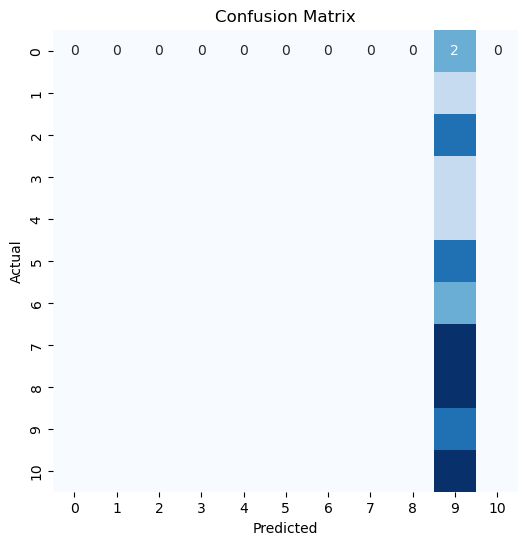

In [68]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
			)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()